# <span style="color:red" font-size=30>Machine learning project</span> 



#### group : Mariem mazouz / safa chaari / abir barouni /ghofrane soltani / med aziz omrani / aziz tebessi

#### Import libraries.

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import isnan
!pip install plotly
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, SVC, LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#### load dataset

In [126]:
data = []
with open('chronic_kidney_disease.arff', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        data.append(line.split(','))


names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class', 'no_name']
    
df = pd.DataFrame(data[29:], columns=names)

In [127]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,no_name
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,7800,5.2,yes,yes,no,good,no,no,ckd,None
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,6000,?,no,no,no,good,no,no,ckd,None
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,7500,?,no,yes,no,poor,no,yes,ckd,None
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,None
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,7300,4.6,no,no,no,good,no,no,ckd,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,7800,6.2,no,no,no,good,no,no,notckd,None
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,6600,5.4,no,no,no,good,no,no,notckd,None
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,7200,5.9,no,no,no,good,no,no,notckd,None
399,58,80,1.025,0,0,normal,normal,notpresent,notpresent,131,...,6800,6.1,no,no,no,good,no,no,notckd,None


# Data understanding

In [128]:
df.describe(include='all')

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,no_name
count,401,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,3
unique,78,11,6,7,7,3,3,3,3,147,...,93,50,3,7,4,4,4,3,4,2
top,60,80,1.020,0,0,normal,normal,notpresent,notpresent,?,...,?,?,no,no,no,good,no,no,ckd,
freq,19,116,106,199,290,201,259,354,374,44,...,105,130,251,257,362,316,322,339,248,2


In [129]:
del df['no_name']

In [130]:
df.shape

(401, 25)

In [131]:
df = df.drop(400)

In [132]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [133]:
df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [134]:
df.isnull().values.any()

False

# Data cleaning

In [135]:
df1=df.replace('?',np.NaN)

In [136]:
df1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [137]:
df1.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,391,388,353,354,351,248,335,396,396,356,...,330,295,270,398,398,398,399,399,399,400
unique,76,10,5,6,6,2,2,2,2,146,...,44,92,49,2,6,3,3,3,2,4
top,60,80,1.020,0,0,normal,normal,notpresent,notpresent,99,...,41,9800,5.2,no,no,no,good,no,no,ckd
freq,19,116,106,199,290,201,259,354,374,10,...,21,11,18,251,257,362,316,322,339,248


In [138]:
df1.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       70
wbcc     105
rbcc     130
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [139]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     391 non-null    object
 1   bp      388 non-null    object
 2   sg      353 non-null    object
 3   al      354 non-null    object
 4   su      351 non-null    object
 5   rbc     248 non-null    object
 6   pc      335 non-null    object
 7   pcc     396 non-null    object
 8   ba      396 non-null    object
 9   bgr     356 non-null    object
 10  bu      381 non-null    object
 11  sc      383 non-null    object
 12  sod     313 non-null    object
 13  pot     312 non-null    object
 14  hemo    348 non-null    object
 15  pcv     330 non-null    object
 16  wbcc    295 non-null    object
 17  rbcc    270 non-null    object
 18  htn     398 non-null    object
 19  dm      398 non-null    object
 20  cad     398 non-null    object
 21  appet   399 non-null    object
 22  pe      399 non-null    ob

#### converting necessary columns to numerical type

In [140]:
df1['age'] = pd.to_numeric(df1['age'], errors='coerce')
df1['bp'] = pd.to_numeric(df1['bp'], errors='coerce')
df1['bgr'] = pd.to_numeric(df1['bgr'], errors='coerce')
df1['sc'] = pd.to_numeric(df1['sc'], errors='coerce')
df1['sod'] = pd.to_numeric(df1['sod'], errors='coerce')
df1['pot'] = pd.to_numeric(df1['pot'], errors='coerce')
df1['hemo'] = pd.to_numeric(df1['hemo'], errors='coerce')
df1['pcv'] = pd.to_numeric(df1['pcv'], errors='coerce')
df1['wbcc'] = pd.to_numeric(df1['wbcc'], errors='coerce')
df1['rbcc'] = pd.to_numeric(df1['rbcc'], errors='coerce')
df1['bu'] = pd.to_numeric(df1['bu'], errors='coerce')
df1['sg'] = pd.to_numeric(df1['sg'], errors='coerce')
df1['su'] = pd.to_numeric(df1['su'], errors='coerce')
df1['al'] = pd.to_numeric(df1['al'], errors='coerce')

In [141]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

# Feature engineering and selection

In [142]:
df1[['age','bp', 'bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc']] = df1[['age','bp', 'bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc']].fillna(df1[['age','bp', 'bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc']].median())


In [143]:
df1.isnull().sum()

age        0
bp         0
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr        0
bu         0
sc         0
sod        0
pot        0
hemo       0
pcv        0
wbcc       0
rbcc       0
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [144]:
df1=df1.replace('	?',np.NaN)
df1[['pcv','wbcc','rbcc']] = df1[['pcv','wbcc','rbcc']].fillna(df1[['pcv','wbcc','rbcc']].median())

In [145]:
df1.isnull().sum()

age        0
bp         0
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr        0
bu         0
sc         0
sod        0
pot        0
hemo       0
pcv        0
wbcc       0
rbcc       0
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [146]:
#IMPUTING MISSING CATEGORICAL VALUES 
#['sg','al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']
df1[['al']] = df1[['al']].fillna(df1['al'].mode()[0])
df1[['su']] = df1[['su']].fillna(df1['su'].mode()[0])
df1[['rbc']] = df1[['rbc']].fillna(df1['rbc'].mode()[0])
df1[['pc']] = df1[['pc']].fillna(df1['pc'].mode()[0])
df1[['ba']] = df1[['ba']].fillna(df1['ba'].mode()[0])
df1['htn'] = df1['htn'].fillna(df1['htn'].mode()[0])
df1['dm'] = df1['dm'].fillna(df1['dm'].mode()[0])
df1['cad'] = df1['cad'].fillna(df1['cad'].mode()[0])
df1['appet'] = df1['appet'].fillna(df1['appet'].mode()[0])
df1['pe'] = df1['pe'].fillna(df1['pe'].mode()[0])
df1['ane'] = df1['ane'].fillna(df1['ane'].mode()[0])
df1[['pcc']] = df1[['pcc']].fillna(df1['pcc'].mode()[0])
df1[['sg']] = df1[['sg']].fillna(df1['sg'].mode()[0])

In [147]:
df1.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [148]:
#replace incorrect values
df1['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
df1['cad'] = df1['cad'].replace(to_replace = '\tno', value='no')

In [149]:
df1.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [150]:
# looking at unique values in categorical columns
for col in df1:
    print(f"{col} has {df1[col].unique()} values\n")

age has [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 55. 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 44. 26. 64.
 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14. 27.
 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25. 20.
 29. 28. 22. 79.] values

bp has [ 80.  50.  70.  90. 100.  60. 110. 140. 180. 120.] values

sg has [1.02  1.01  1.005 1.015 1.025] values

al has [1. 4. 2. 3. 0. 5.] values

su has [0. 3. 4. 1. 2. 5.] values

rbc has ['normal' 'abnormal'] values

pc has ['normal' 'abnormal'] values

pcc has ['notpresent' 'present'] values

ba has ['notpresent' 'present'] values

bgr has [121. 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98. 157.
  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159. 140.
 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253. 141.
 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158. 165.
 132. 104. 127. 415. 169. 251. 109. 280. 2

In [151]:
# replace incorrect values
df1['dm'] = df1['dm'].replace(to_replace = '', value=np.NaN)
df1['appet'] = df1['appet'].replace(to_replace ='no', value=np.NaN)
df1['pe'] = df1['pe'].replace(to_replace = 'good', value=np.NaN)
df1['class'] = df1['class'].replace(to_replace = 'ckd\t', value=np.NaN)
df1['class'] = df1['class'].replace(to_replace = 'no', value=np.NaN)

In [152]:
# looking at unique values in categorical columns
for col in df1:
    print(f"{col} has {df1[col].unique()} values\n")

age has [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 55. 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 44. 26. 64.
 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14. 27.
 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25. 20.
 29. 28. 22. 79.] values

bp has [ 80.  50.  70.  90. 100.  60. 110. 140. 180. 120.] values

sg has [1.02  1.01  1.005 1.015 1.025] values

al has [1. 4. 2. 3. 0. 5.] values

su has [0. 3. 4. 1. 2. 5.] values

rbc has ['normal' 'abnormal'] values

pc has ['normal' 'abnormal'] values

pcc has ['notpresent' 'present'] values

ba has ['notpresent' 'present'] values

bgr has [121. 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98. 157.
  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159. 140.
 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253. 141.
 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158. 165.
 132. 104. 127. 415. 169. 251. 109. 280. 2

In [153]:
#IMPUTING MISSING VALUES
df1['dm'] = df1['dm'].fillna(df1['dm'].mode()[0])
df1['appet'] = df1['appet'].fillna(df1['appet'].mode()[0])
df1['pe'] = df1['pe'].fillna(df1['pe'].mode()[0])
df1[['class']] = df1[['class']].fillna(df1['class'].mode()[0])

In [154]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   rbc     400 non-null    object 
 6   pc      400 non-null    object 
 7   pcc     400 non-null    object 
 8   ba      400 non-null    object 
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wbcc    400 non-null    float64
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    object 
 19  dm      400 non-null    object 
 20  cad     400 non-null    object 
 21  appet   400 non-null    object 
 22  pe

In [155]:
# looking at unique values in categorical columns
for col in df1:
    print(f"{col} has {df1[col].unique()} values\n")

age has [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 55. 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 44. 26. 64.
 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14. 27.
 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25. 20.
 29. 28. 22. 79.] values

bp has [ 80.  50.  70.  90. 100.  60. 110. 140. 180. 120.] values

sg has [1.02  1.01  1.005 1.015 1.025] values

al has [1. 4. 2. 3. 0. 5.] values

su has [0. 3. 4. 1. 2. 5.] values

rbc has ['normal' 'abnormal'] values

pc has ['normal' 'abnormal'] values

pcc has ['notpresent' 'present'] values

ba has ['notpresent' 'present'] values

bgr has [121. 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98. 157.
  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159. 140.
 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253. 141.
 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158. 165.
 132. 104. 127. 415. 169. 251. 109. 280. 2

In [156]:
# Extracting categorical and numerical columns
cat_cols = [col for col in df1.columns if df1[col].dtype == 'object']
num_cols = [col for col in df1.columns if df1[col].dtype != 'object']
num_cols

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wbcc',
 'rbcc']

#### There is some ambugity present in the columns we have to fix that.

In [157]:
#Encoding
df1['ane'] = df1['ane'].map({'no': 0, 'yes': 1})
df1['ane'] = pd.to_numeric(df1['ane'], errors='coerce')
df1['pe'] = df1['pe'].map({'no': 0, 'yes': 1})
df1['pe'] = pd.to_numeric(df1['pe'], errors='coerce')
df1['cad'] = df1['cad'].map({'no': 0, 'yes': 1})
df1['cad'] = pd.to_numeric(df1['cad'], errors='coerce')
df1['dm'] = df1['dm'].map({'no': 0, 'yes': 1})
df1['dm'] = pd.to_numeric(df1['dm'], errors='coerce')
df1['htn'] = df1['htn'].map({'no': 0, 'yes': 1})
df1['htn'] = pd.to_numeric(df1['htn'], errors='coerce')
df1['class'] = df1['class'].map({'ckd': 0, 'notckd': 1})
df1['class'] = pd.to_numeric(df1['class'], errors='coerce')

In [158]:
for col in df1:
    print(f"{col} has {df1[col].unique()} values\n")

age has [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 55. 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 44. 26. 64.
 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14. 27.
 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25. 20.
 29. 28. 22. 79.] values

bp has [ 80.  50.  70.  90. 100.  60. 110. 140. 180. 120.] values

sg has [1.02  1.01  1.005 1.015 1.025] values

al has [1. 4. 2. 3. 0. 5.] values

su has [0. 3. 4. 1. 2. 5.] values

rbc has ['normal' 'abnormal'] values

pc has ['normal' 'abnormal'] values

pcc has ['notpresent' 'present'] values

ba has ['notpresent' 'present'] values

bgr has [121. 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98. 157.
  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159. 140.
 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253. 141.
 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158. 165.
 132. 104. 127. 415. 169. 251. 109. 280. 2

In [159]:
cat_cols1 = [col for col in df1.columns if df1[col].dtype == 'object']

In [160]:
cat_cols1

['rbc', 'pc', 'pcc', 'ba', 'appet']

#### As all of the categorical columns have 2 categories we can use label encoder

In [161]:
le = LabelEncoder()

for col in cat_cols1:
    df1[col] = le.fit_transform(df1[col])

In [162]:
df1.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,145.062500,...,39.082500,8298.500000,4.737750,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.372500
std,16.982996,13.489785,0.005434,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,75.260774,...,8.162245,2529.593814,0.841439,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484076
min,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,101.000000,...,34.000000,6975.000000,4.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,121.000000,...,40.000000,8000.000000,4.800000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,150.000000,...,44.000000,9400.000000,5.100000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [163]:
df1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1


#### Normalisation

In [164]:
# Normalisation
df1= df1.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [165]:
df1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0.522727,0.230769,0.75,0.2,0.0,1.0,1.0,0.0,0.0,0.211538,...,0.777778,0.231405,0.525424,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.056818,0.000000,0.75,0.8,0.0,1.0,1.0,0.0,0.0,0.211538,...,0.644444,0.157025,0.457627,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.681818,0.230769,0.25,0.4,0.6,1.0,1.0,0.0,0.0,0.856838,...,0.488889,0.219008,0.457627,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.522727,0.153846,0.00,0.8,0.0,1.0,0.0,1.0,0.0,0.202991,...,0.511111,0.185950,0.305085,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.556818,0.230769,0.25,0.4,0.0,1.0,1.0,0.0,0.0,0.179487,...,0.577778,0.210744,0.423729,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.602273,0.230769,0.75,0.0,0.0,1.0,1.0,0.0,0.0,0.252137,...,0.844444,0.185950,0.474576,0.0,0.0,0.0,0.0,0.0,0.0,1.0
396,0.454545,0.153846,1.00,0.0,0.0,1.0,1.0,0.0,0.0,0.113248,...,1.000000,0.231405,0.694915,0.0,0.0,0.0,0.0,0.0,0.0,1.0
397,0.113636,0.230769,0.75,0.0,0.0,1.0,1.0,0.0,0.0,0.166667,...,0.888889,0.181818,0.559322,0.0,0.0,0.0,0.0,0.0,0.0,1.0
398,0.170455,0.076923,1.00,0.0,0.0,1.0,1.0,0.0,0.0,0.196581,...,0.933333,0.206612,0.644068,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Detecting the outliers

In [166]:
g = sns.pairplot(df1, vars =['bp','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc'],hue = 'class')
g.map_diag(sns.distplot)
g.add_legend()
g.fig.suptitle('outliers plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

C:\Users\Abir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

In [167]:
sns.boxplot(x=df1["bgr"],fliersize=10,orient="h")

<AxesSubplot:xlabel='bgr', ylabel='Density'>

In [168]:
sns.boxplot(x=df1["bp"],fliersize=10,orient="h")

<AxesSubplot:xlabel='bp', ylabel='Density'>

In [169]:
sns.boxplot(x=df1["bu"],fliersize=10,orient="h")

<AxesSubplot:xlabel='bu', ylabel='Density'>

In [170]:
sns.boxplot(x=df1["sc"],fliersize=10,orient="h")

<AxesSubplot:xlabel='sc', ylabel='Density'>

In [171]:
sns.boxplot(x=df1["sod"],fliersize=10,orient="h")

<AxesSubplot:xlabel='sod', ylabel='Density'>

In [172]:
sns.boxplot(x=df1["pot"],fliersize=10,orient="h")

<AxesSubplot:xlabel='pot', ylabel='Density'>

In [173]:
sns.boxplot(x=df1["hemo"],fliersize=10,orient="h")

<AxesSubplot:xlabel='hemo', ylabel='Density'>

In [174]:
sns.boxplot(x=df1["pcv"],fliersize=10,orient="h")

<AxesSubplot:xlabel='pcv', ylabel='Density'>

In [175]:
sns.boxplot(x=df1["wbcc"],fliersize=10,orient="h")

<AxesSubplot:xlabel='wbcc', ylabel='Density'>

In [176]:
sns.boxplot(x=df1["rbcc"],fliersize=10,orient="h")

<AxesSubplot:xlabel='rbcc', ylabel='Density'>

### Fixing and dealing with the outliers

In [177]:
new_df1 = df1.copy()

In [178]:
for x in ['hemo']:
    q75,q25 = np.percentile(new_df1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    #remplacer les out par nan
    new_df1.loc[new_df1[x]<min,x]=new_df1['hemo'].mean()
    new_df1.loc[new_df1[x]>max,x]=new_df1['hemo'].mean()

In [179]:
sns.boxplot(x=new_df1["hemo"],fliersize=10,orient="h")

<AxesSubplot:xlabel='hemo', ylabel='Density'>

In [180]:
for x in ['pot']:
    q75,q25 = np.percentile(new_df1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    #remplacer les out par nan
    new_df1.loc[new_df1[x]<min,x]=new_df1['pot'].mean()
    new_df1.loc[new_df1[x]>max,x]=new_df1['pot'].mean()

In [181]:
sns.boxplot(x=new_df1["pot"],fliersize=10,orient="h")

<AxesSubplot:xlabel='pot', ylabel='Density'>

In [182]:
for x in ['bp']:
    q75,q25 = np.percentile(new_df1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    #remplacer les out par nan
    new_df1.loc[new_df1[x]<min,x]=new_df1['bp'].mean()
    new_df1.loc[new_df1[x]>max,x]=new_df1['bp'].mean()

In [183]:
sns.boxplot(x=new_df1["bp"],fliersize=10,orient="h")

<AxesSubplot:xlabel='bp', ylabel='Density'>

In [184]:
for x in ['bgr']:
    q75,q25 = np.percentile(new_df1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    #remplacer les out par nan
    new_df1.loc[new_df1[x]<min,x]=new_df1['bgr'].mean()
    new_df1.loc[new_df1[x]>max,x]=new_df1['bgr'].mean()

In [185]:
sns.boxplot(x=new_df1["bgr"],fliersize=10,orient="h")

<AxesSubplot:xlabel='bgr', ylabel='Density'>

In [186]:
for x in ['bu']:
    q75,q25 = np.percentile(new_df1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    #remplacer les out par nan
    new_df1.loc[new_df1[x]<min,x]=new_df1['bu'].mean()
    new_df1.loc[new_df1[x]>max,x]=new_df1['bu'].mean()

In [187]:
sns.boxplot(x=new_df1["bu"],fliersize=10,orient="h")

<AxesSubplot:xlabel='bu', ylabel='Density'>

In [188]:
for x in ['sc']:
    q75,q25 = np.percentile(new_df1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    #remplacer les out par nan
    new_df1.loc[new_df1[x]<min,x]=new_df1['sc'].mean()
    new_df1.loc[new_df1[x]>max,x]=new_df1['sc'].mean()

In [189]:
sns.boxplot(x=new_df1["sc"],fliersize=10,orient="h")

<AxesSubplot:xlabel='sc', ylabel='Density'>

In [190]:
for x in ['sod']:
    q75,q25 = np.percentile(new_df1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    #remplacer les out par nan
    new_df1.loc[new_df1[x]<min,x]=new_df1['sod'].mean()
    new_df1.loc[new_df1[x]>max,x]=new_df1['sod'].mean()

In [191]:
sns.boxplot(x=new_df1["sod"],fliersize=10,orient="h")

<AxesSubplot:xlabel='sod', ylabel='Density'>

In [192]:
for x in ['pcv']:
    q75,q25 = np.percentile(new_df1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    #remplacer les out par nan
    new_df1.loc[new_df1[x]<min,x]=new_df1['pcv'].mean()
    new_df1.loc[new_df1[x]>max,x]=new_df1['pcv'].mean()


In [193]:
sns.boxplot(x=new_df1["pcv"],fliersize=10,orient="h")

<AxesSubplot:xlabel='pcv', ylabel='Density'>

In [194]:
for x in ['rbcc']:
    q75,q25 = np.percentile(new_df1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    #remplacer les out par nan
    new_df1.loc[new_df1[x]<min,x]=new_df1['rbcc'].mean()
    new_df1.loc[new_df1[x]>max,x]=new_df1['rbcc'].mean()


In [195]:
sns.boxplot(x=new_df1["rbcc"],fliersize=10,orient="h")

<AxesSubplot:xlabel='rbcc', ylabel='Density'>

In [196]:
for x in ['wbcc']:
    q75,q25 = np.percentile(new_df1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    #remplacer les out par nan
    new_df1.loc[new_df1[x]<min,x]=new_df1['wbcc'].mean()
    new_df1.loc[new_df1[x]>max,x]=new_df1['wbcc'].mean()

In [197]:
sns.boxplot(x=new_df1["wbcc"],fliersize=10,orient="h")

<AxesSubplot:xlabel='wbcc', ylabel='Density'>

# Visualization

C:\Users\Abir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Abir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Abir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Abir\anaconda3\lib\site-p

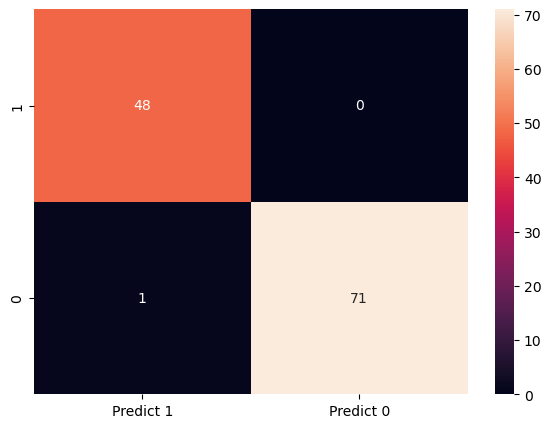

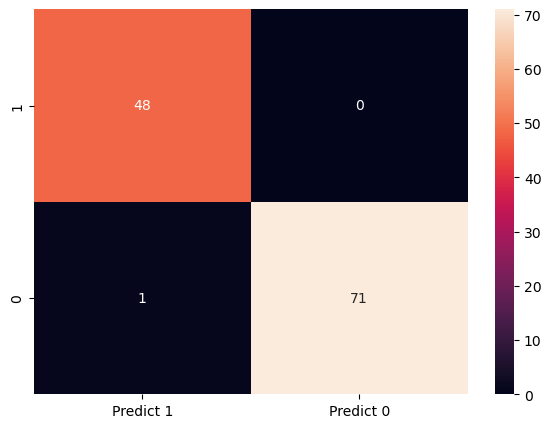

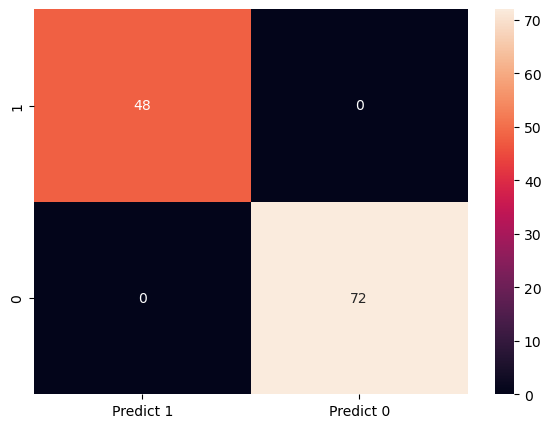

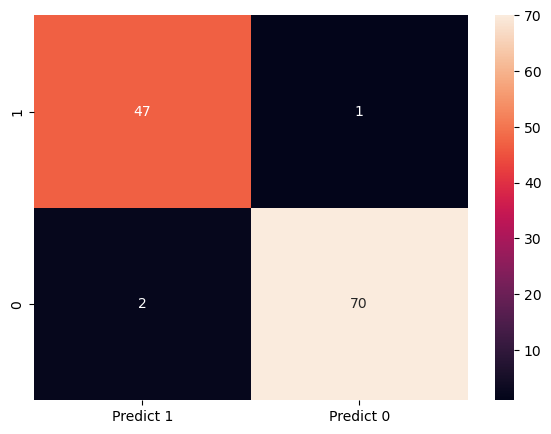

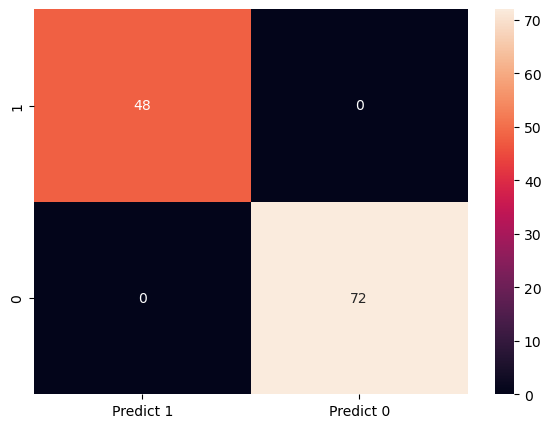

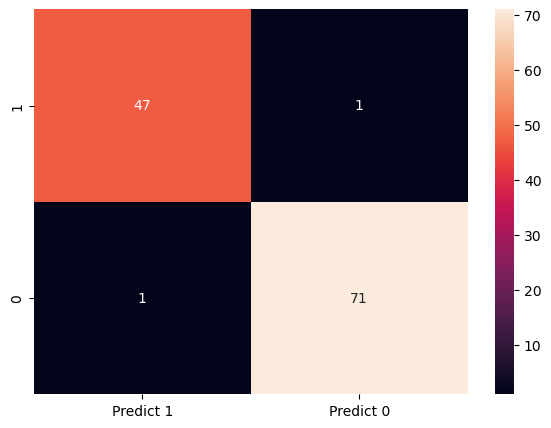

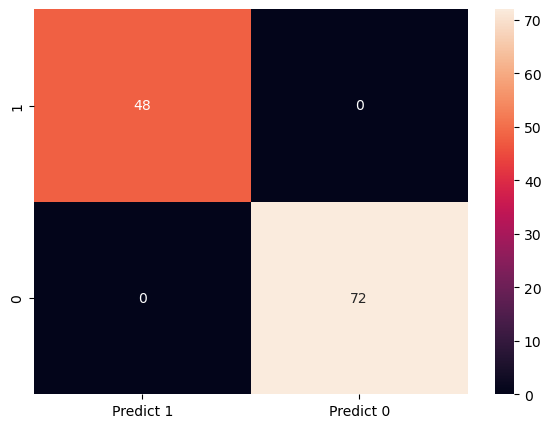

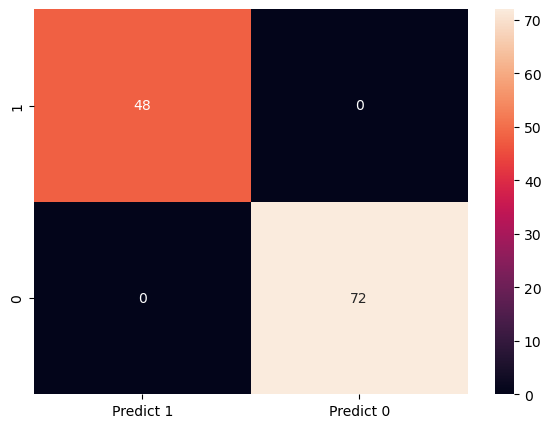

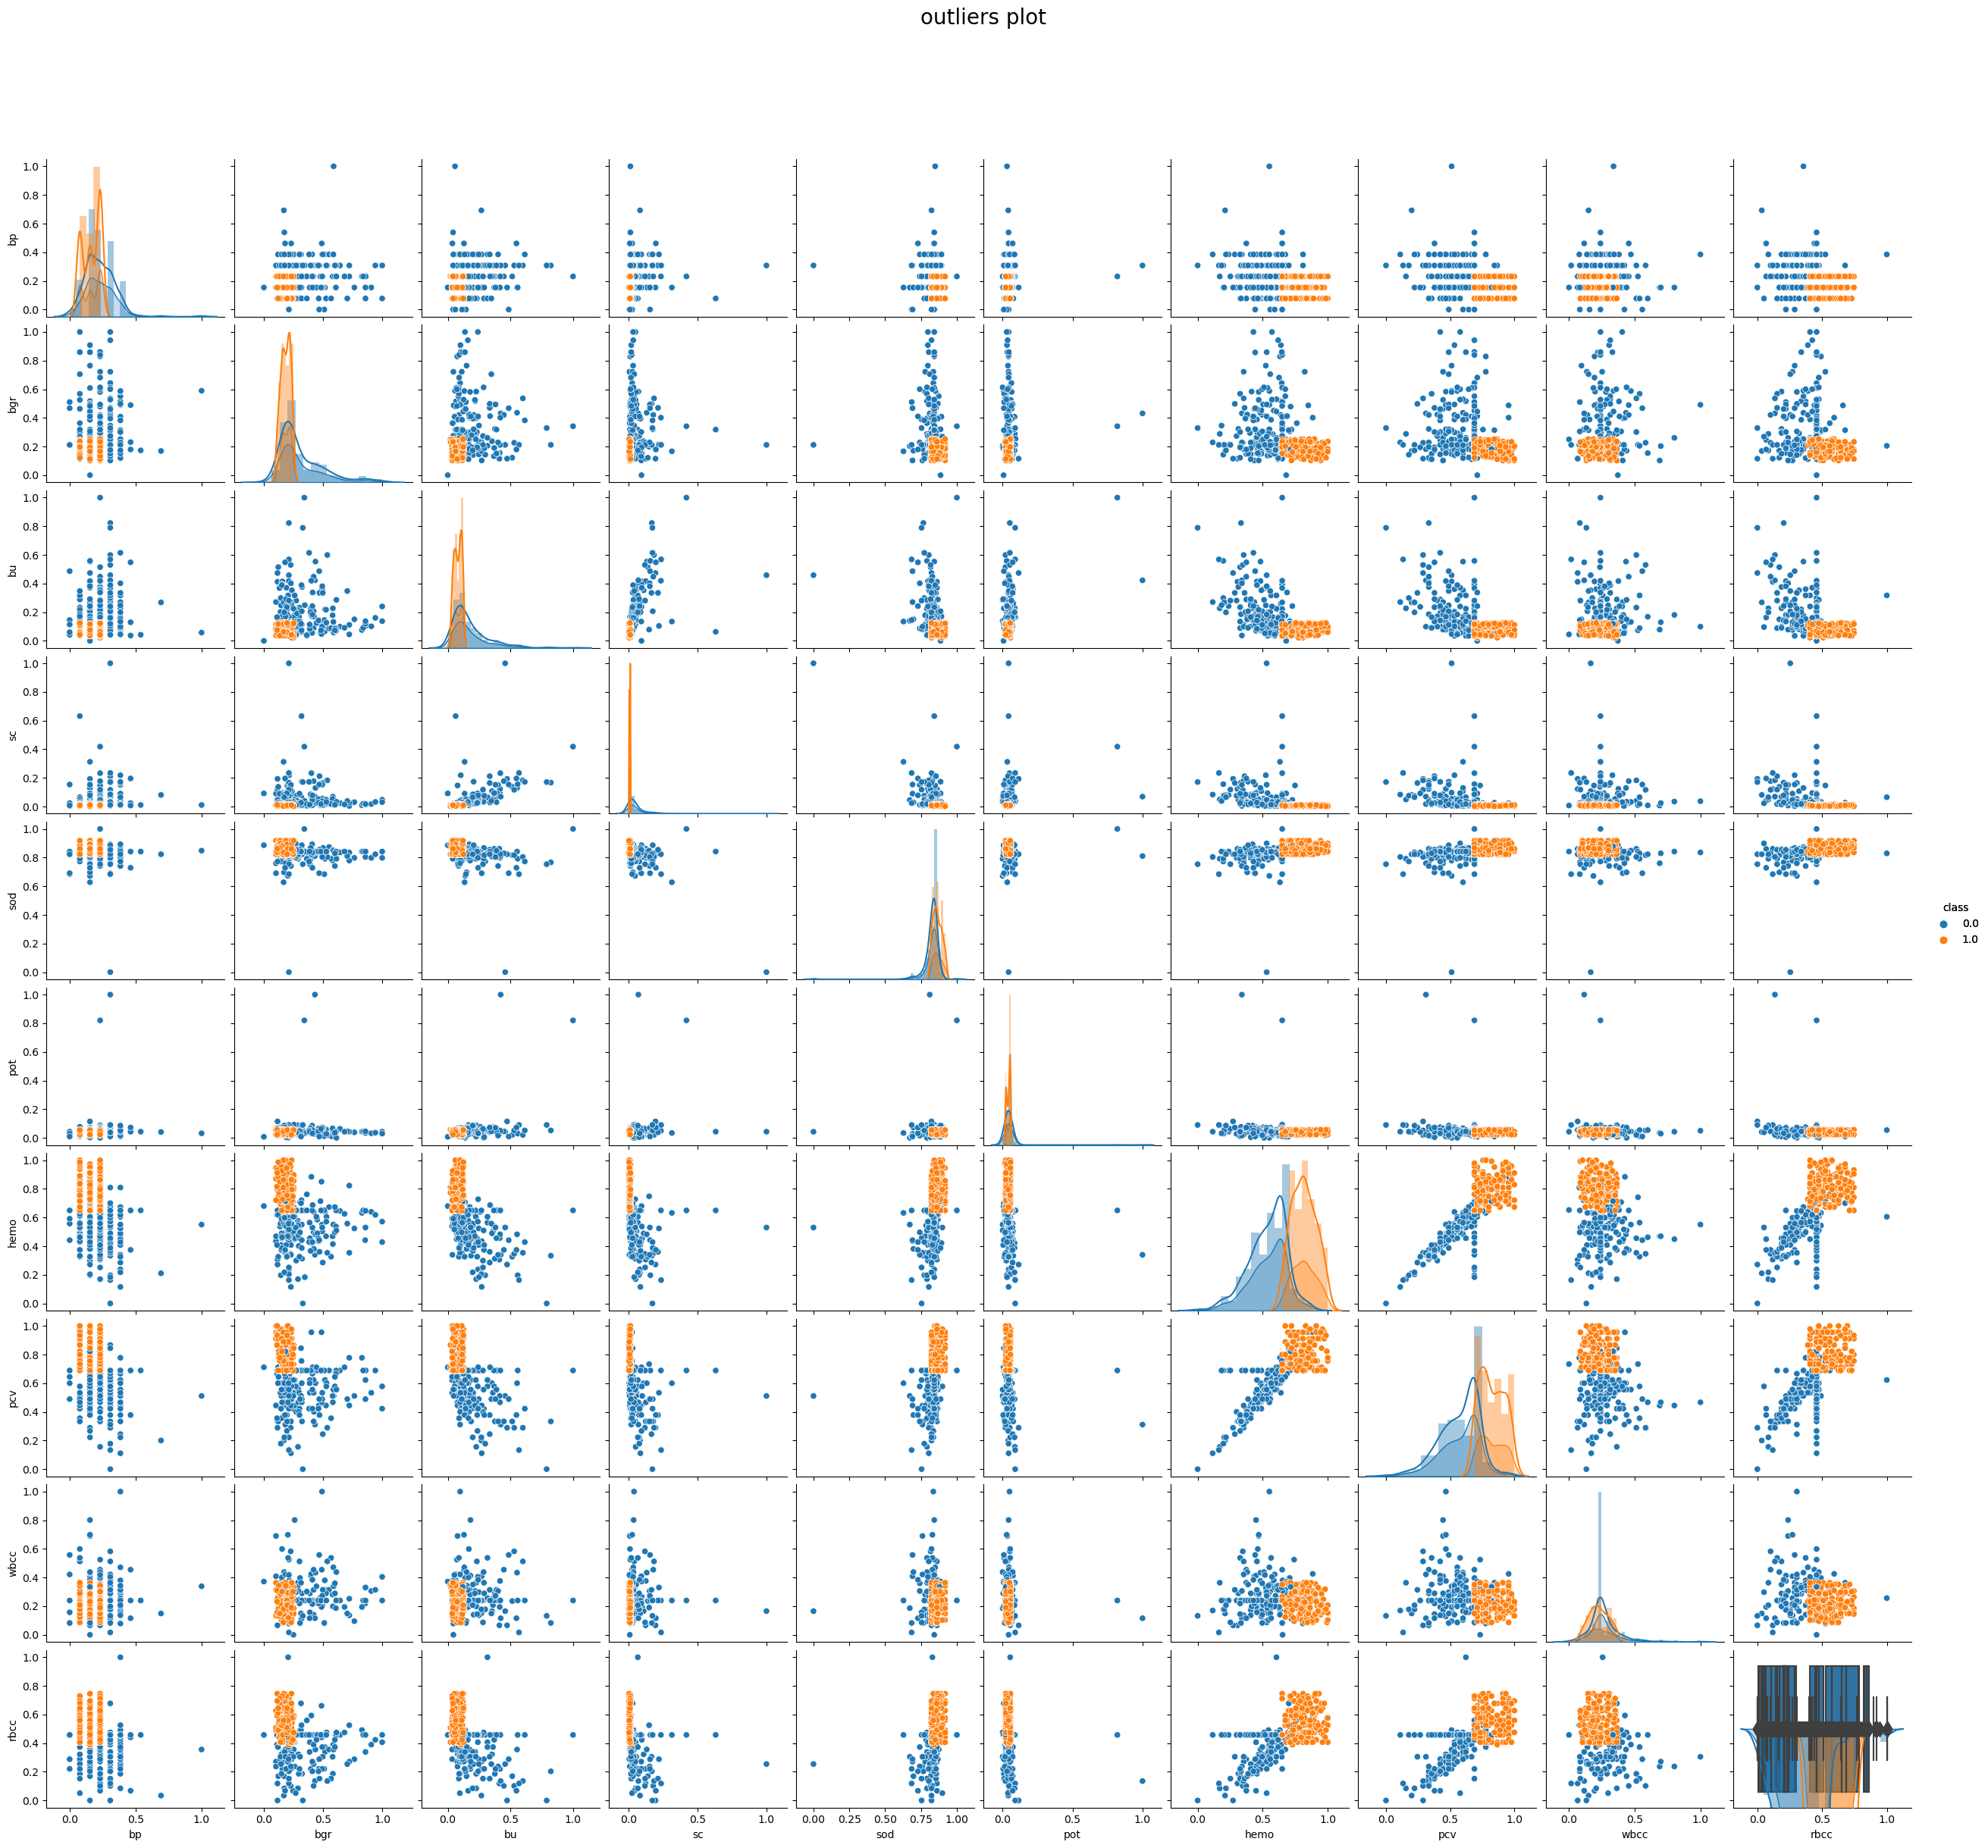

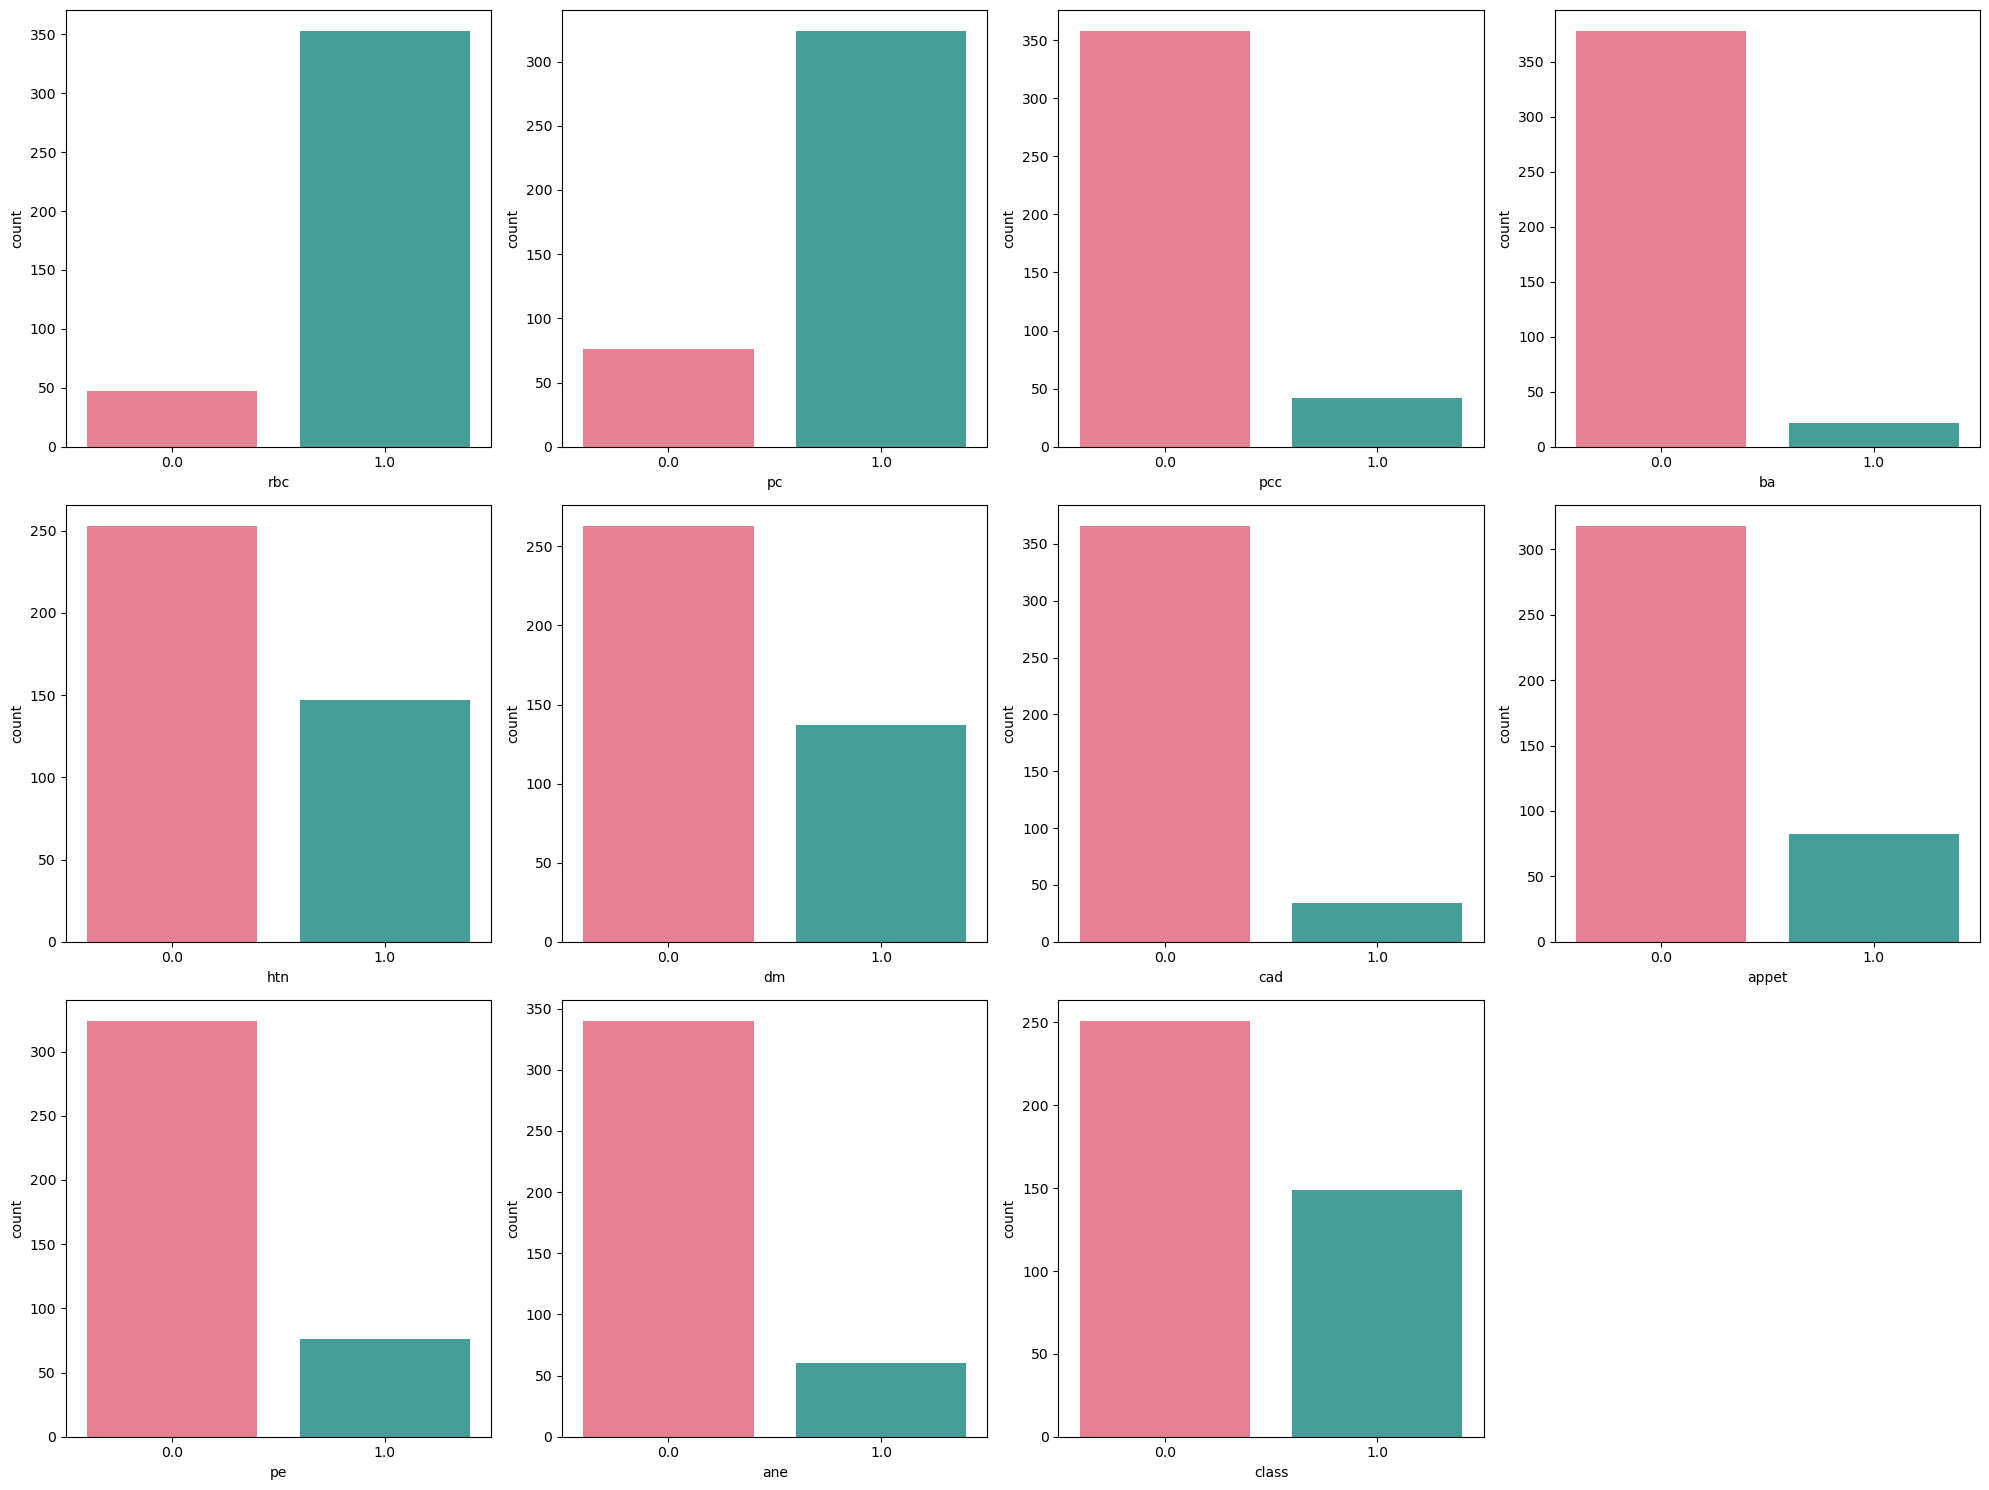

In [198]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df1[column], palette = 'husl')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

C:\Users\Abir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

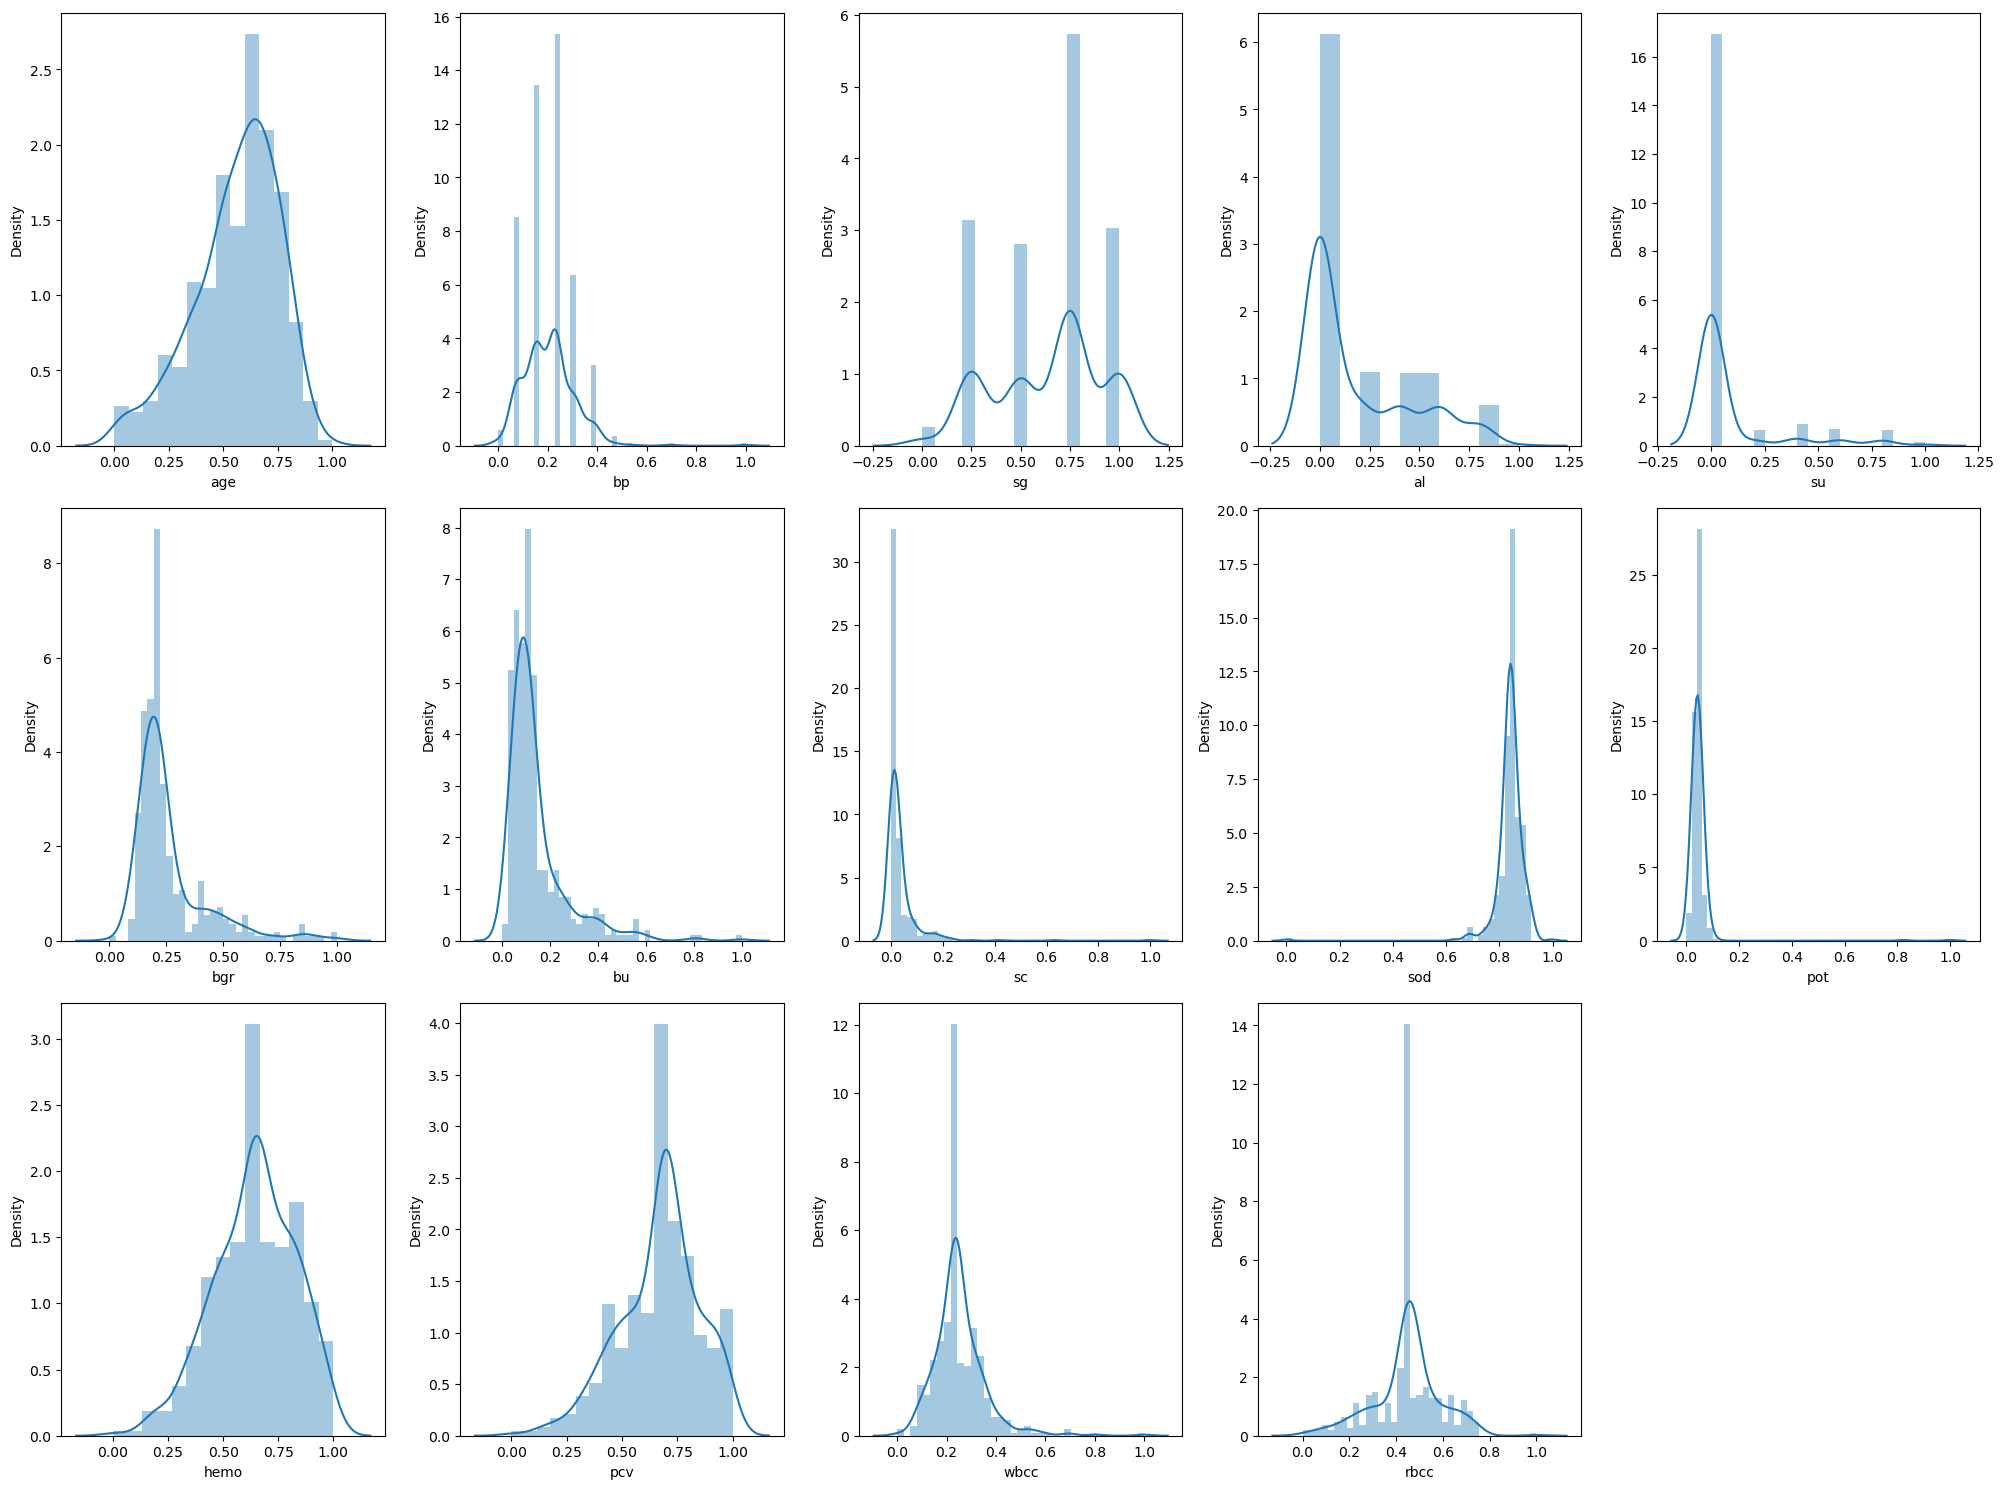

In [199]:
# checking numerical features distribution
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [200]:
my_labels =('chkn','notckd')
ax = df1['class'].value_counts().plot(kind='pie', figsize=(12,12), autopct='%1.1f%%', labels=None)
ax.axes.get_yaxis().set_visible(False)
plt.legend(loc=5, labels=my_labels)

# Feature selection

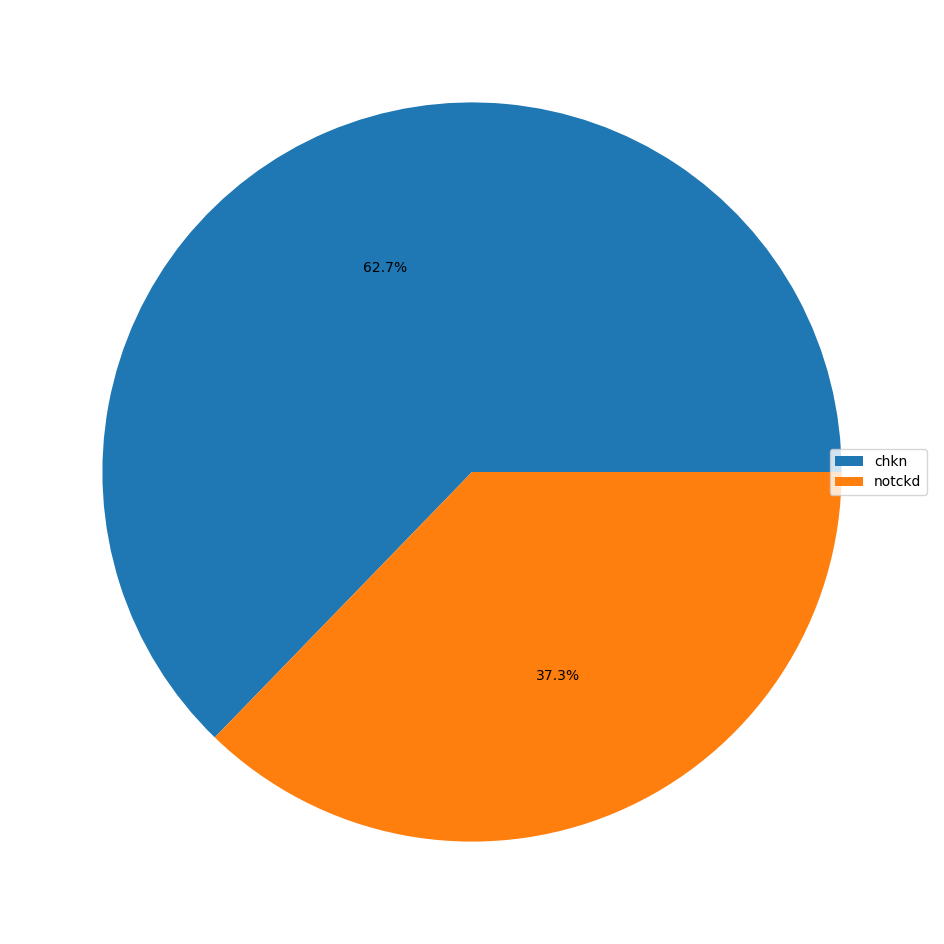

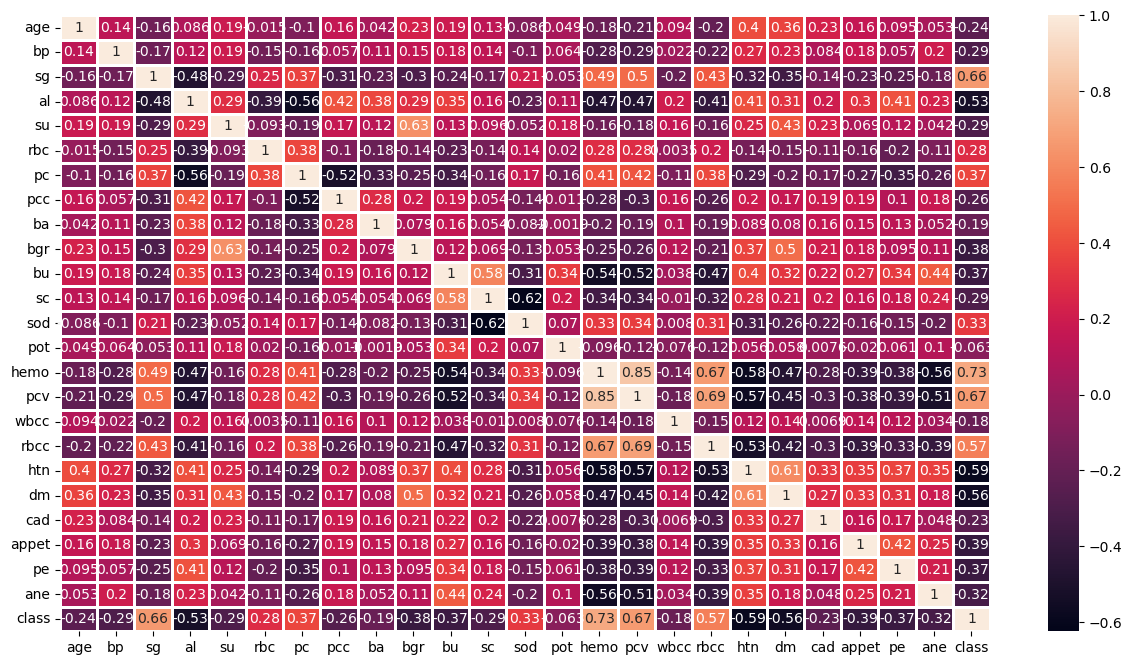

In [201]:
#matrice de correlation
plt.figure(figsize = (15, 8))
sns.heatmap(df1.corr(), annot = True, linewidths = 2, linecolor = 'white')
plt.show()

In [202]:
df1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0.522727,0.230769,0.75,0.2,0.0,1.0,1.0,0.0,0.0,0.211538,...,0.777778,0.231405,0.525424,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.056818,0.000000,0.75,0.8,0.0,1.0,1.0,0.0,0.0,0.211538,...,0.644444,0.157025,0.457627,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.681818,0.230769,0.25,0.4,0.6,1.0,1.0,0.0,0.0,0.856838,...,0.488889,0.219008,0.457627,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.522727,0.153846,0.00,0.8,0.0,1.0,0.0,1.0,0.0,0.202991,...,0.511111,0.185950,0.305085,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.556818,0.230769,0.25,0.4,0.0,1.0,1.0,0.0,0.0,0.179487,...,0.577778,0.210744,0.423729,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.602273,0.230769,0.75,0.0,0.0,1.0,1.0,0.0,0.0,0.252137,...,0.844444,0.185950,0.474576,0.0,0.0,0.0,0.0,0.0,0.0,1.0
396,0.454545,0.153846,1.00,0.0,0.0,1.0,1.0,0.0,0.0,0.113248,...,1.000000,0.231405,0.694915,0.0,0.0,0.0,0.0,0.0,0.0,1.0
397,0.113636,0.230769,0.75,0.0,0.0,1.0,1.0,0.0,0.0,0.166667,...,0.888889,0.181818,0.559322,0.0,0.0,0.0,0.0,0.0,0.0,1.0
398,0.170455,0.076923,1.00,0.0,0.0,1.0,1.0,0.0,0.0,0.196581,...,0.933333,0.206612,0.644068,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [203]:
##target='class'

In [204]:
y = df1['class']
X = df1.loc[:, df.columns != 'class']


#checking for NA values
X.isna().values.any()
y.isna().values.any()

False

Optimal number of features : 10


C:\Users\Abir\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


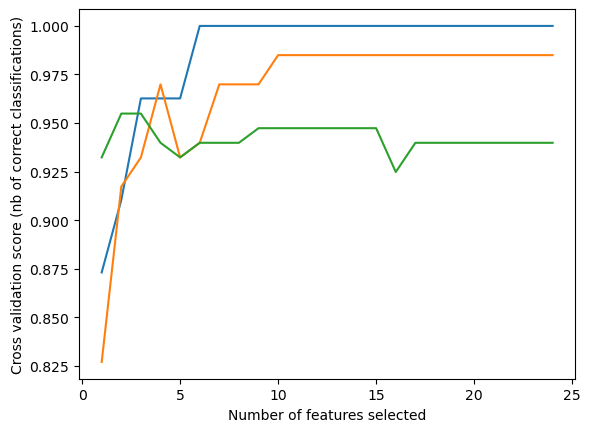

[11  1  1  1  4  3  2  9 13  7  6  5  8 12  1  1 10  1  1  1 14  1  1 15]


In [205]:
svc = SVC(kernel="linear")

rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(3),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plotting number of features and cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
print(rfecv.ranking_)

# Modeling

### split data

In [206]:
ind_col = [col for col in df1.columns if col != 'class']
dep_col = 'class'

X = df1[ind_col]
y = df1[dep_col]

In [207]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

### Balancing Data

In [208]:
len(y_train[y_train==1]), len(y_train[y_train==0]), y_train.shape

(101, 179, (280,))

### Under Sampling

In [209]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [210]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

X_train_down,y_train_down = rus.fit_resample(X_train, y_train)

print(len(y_train_down[y_train_down==0]), len(y_train_down[y_train_down==1]))
print(len(X_train_down))

101 101
202


### Over Sampling

In [211]:
# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(sampling_strategy=1)

X_train, y_train = os.fit_resample(X_train, y_train)

print(len(y_train[y_train==0]), len(y_train[y_train==1]))
print(len(X_train))

179 179
358


## Logistic Regression

In [273]:
def lr_grid_search(X, y):
    model = LogisticRegression()
    
    # Create a dictionary of all values we want to test
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalty = ['l2']
    c_values = [100, 10, 1.0, 0.1, 0.01]
    
    # define grid search
    param_grid = dict(solver=solvers, penalty=penalty, C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
    grid_result = grid_search.fit(X, y)
    
    return grid_result.best_params_

In [274]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
lr_grid_search(X_train, y_train)

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

### Over sample Logistic

In [275]:
from sklearn import metrics
from sklearn.metrics import classification_report
lr = LogisticRegression(C=100, penalty='l2', solver='newton-cg')
lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

print(metrics.classification_report(y_test, y_pred_lr))

lr_score = lr.score(X_train,y_train)
print(lr_score)

lr_score = lr.score(X_test,y_test)
print(lr_score)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        72
         1.0       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

0.994413407821229
1.0


In [276]:
lr_tacc = lr.score(X_test,y_test)
lr_train_acc = lr.score(X_train, y_train)

### Confusion matrix of Logistic Regression Model

In [277]:
cm = metrics.confusion_matrix(y_test, y_pred_lr, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

<AxesSubplot:>

### Under Sample Logistic

In [278]:
lr = LogisticRegression(C=100, penalty='l2', solver='newton-cg')
lr.fit(X_train_down,y_train_down)

y_pred_lr = lr.predict(X_test)

print(metrics.classification_report(y_test, y_pred_lr))

lr_score = lr.score(X_train_down,y_train_down)
print(lr_score)

lr_score = lr.score(X_test,y_test)
print(lr_score)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        72
         1.0       0.98      1.00      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

0.995049504950495
0.9916666666666667


In [218]:
cm = metrics.confusion_matrix(y_test, y_pred_lr, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

<AxesSubplot:>

## Decision Tree Classifier

In [279]:
def dtree_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 15)}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # decision tree model
    dtree = DecisionTreeClassifier()
    
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree, param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
    #fit model to data
    dtree_gscv.fit(X, y)
    
    return dtree_gscv.best_params_

In [280]:
from sklearn.tree import DecisionTreeClassifier
dtree_grid_search(X_train, y_train)

{'criterion': 'entropy', 'max_depth': 7}

### Over Sample Decision Tree

In [281]:
dTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
dTree.fit(X_train, y_train)

print(dTree.score(X_train,y_train))
print(dTree.score(X_test,y_test))

y_pred_dtree = dTree.predict(X_test)

print(metrics.classification_report(y_test, y_pred_dtree))

1.0
0.9833333333333333
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        72
         1.0       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [282]:
dt_tacc = dTree.score(X_test,y_test)
dt_train_acc = dTree.score(X_train, y_train)

### Confusion Matrix of Decision Tree Classifier

In [257]:
cm = metrics.confusion_matrix(y_test, y_pred_dtree, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

<AxesSubplot:>

### Under Sample Decision Tree

In [283]:
dtree_grid_search(X_train_down, y_train_down)

{'criterion': 'entropy', 'max_depth': 14}

In [284]:
dTree = DecisionTreeClassifier(criterion = 'entropy', max_depth =14)
dTree.fit(X_train_down, y_train_down)

print(dTree.score(X_train_down,y_train_down))
print(dTree.score(X_test,y_test))

y_pred_dtree = dTree.predict(X_test)

print(metrics.classification_report(y_test, y_pred_dtree))

1.0
0.9833333333333333
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        72
         1.0       0.96      1.00      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



In [285]:
cm = metrics.confusion_matrix(y_test, y_pred_dtree, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

<AxesSubplot:>

## Ensemble learning - AdaBoost

In [286]:
def ada_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = {'n_estimators':[10, 50, 100, 500], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # AdaBoost model
    ada = AdaBoostClassifier()
    
    # Use gridsearch to test all values
    ada_gscv = GridSearchCV(ada, param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
    #fit model to data
    grid_result = ada_gscv.fit(X, y)
    
    return ada_gscv.best_params_

In [287]:
from sklearn.ensemble import AdaBoostClassifier
ada_grid_search(X_train, y_train)

{'learning_rate': 0.1, 'n_estimators': 50}

### Over Sample AdaBoost

In [251]:
abcl = AdaBoostClassifier(n_estimators=50, learning_rate = 0.1)
abcl = abcl.fit(X_train, y_train)

y_pred_abcl = abcl.predict(X_test)

print(abcl.score(X_train, y_train))
print(abcl.score(X_test,y_test))

print(metrics.classification_report(y_test, y_pred_abcl))

0.9972067039106145
1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        72
         1.0       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [241]:
ada_train_acc = abcl.score(X_train, y_train)
ada_tacc = abcl.score(X_test,y_test)

### Confusion Matrix AdaBoosting model

In [242]:
cm = metrics.confusion_matrix(y_test, y_pred_abcl, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

<AxesSubplot:>

### Under Sample AdaBoost

In [244]:
ada_grid_search(X_train_down, y_train_down)

{'learning_rate': 0.1, 'n_estimators': 50}

In [252]:
abcl = AdaBoostClassifier(n_estimators=50, learning_rate = 0.1)
abcl = abcl.fit(X_train_down, y_train_down)

y_pred_abcl = abcl.predict(X_test)

print(abcl.score(X_train_down, y_train_down))
print(abcl.score(X_test,y_test))

print(metrics.classification_report(y_test, y_pred_abcl))

1.0
1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        72
         1.0       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [246]:
cm = metrics.confusion_matrix(y_test, y_pred_abcl, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

<AxesSubplot:>

# Random forest classifier

In [253]:
def rf_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = { 
    'n_estimators': [5,10,20,40,50,60,70,80,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # Random Forest model
    rf = RandomForestClassifier()
    
    #use gridsearch to test all values
    rf_gscv = GridSearchCV(rf, param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
    #fit model to data
    rf_gscv.fit(X, y)
    
    return rf_gscv.best_params_

In [254]:
from sklearn.ensemble import RandomForestClassifier
rf_grid_search(X_train, y_train)

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 60}

### Over Sample Random Forest

In [265]:
rfcl = RandomForestClassifier(n_estimators=60, max_features='log2', max_depth=6, criterion='gini')
rfcl = rfcl.fit(X_train, y_train)

y_pred_rf = rfcl.predict(X_test)

print(rfcl.score(X_train,y_train))
print(rfcl.score(X_test,y_test))

print(metrics.classification_report(y_test, y_pred_rf))

0.9972067039106145
1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        72
         1.0       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [266]:
rf_tacc = rfcl.score(X_test,y_test)
rf_train_acc = rfcl.score(X_train, y_train)

### Confusion matrix of Random Forest Classifier Model

In [267]:
cm = metrics.confusion_matrix(y_test, y_pred_rf, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

<AxesSubplot:>

### Under Sample Random Forest

In [294]:
rf_grid_search(X_train_down, y_train_down)

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 10}

In [297]:
rfcl = RandomForestClassifier(n_estimators=10, max_features='sqrt', max_depth=6, criterion='gini')
rfcl = rfcl.fit(X_train_down, y_train_down)

y_pred_rf = rfcl.predict(X_test)

print(rfcl.score(X_train_down,y_train_down))
print(rfcl.score(X_test,y_test))

print(metrics.classification_report(y_test, y_pred_rf))

0.995049504950495
0.9833333333333333
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        72
         1.0       0.98      0.98      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [298]:
cm = metrics.confusion_matrix(y_test, y_pred_rf, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

<AxesSubplot:>

# kNN

In [303]:
def knn_grid_search(X, y):
    #create a dictionary of all values we want to test
    k_range = list(range(1, 31))
    param_grid = dict(n_neighbors=k_range)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    knn = KNeighborsClassifier()
    
    #use gridsearch to test all values
    knn_gscv = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    #fit model to data
    knn_gscv.fit(X, y)
    
    return knn_gscv.best_params_

In [304]:
from sklearn.neighbors import KNeighborsClassifier
knn_grid_search(X_train, y_train)

{'n_neighbors': 2}

### Over Sample kNN

In [305]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

print(metrics.classification_report(y_test, y_pred_knn))

0.994413407821229
1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        72
         1.0       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [306]:
knn_tacc = knn.score(X_test, y_test)
knn_train_acc = knn.score(X_train, y_train)

### Confusion Matrix of kNN

In [307]:
cm = metrics.confusion_matrix(y_test, y_pred_knn, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

<AxesSubplot:>

### Under Sample kNN

In [309]:
knn_grid_search(X_train_down, y_train_down)

{'n_neighbors': 2}

In [310]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_down, y_train_down)

y_pred_knn = knn.predict(X_test)

print(knn.score(X_train_down, y_train_down))
print(knn.score(X_test, y_test))

print(metrics.classification_report(y_test, y_pred_knn))

1.0
0.9916666666666667
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        72
         1.0       0.98      1.00      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [311]:
cm = metrics.confusion_matrix(y_test, y_pred_knn, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

<AxesSubplot:>

# SVM

In [312]:
def svm_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001, 0.4, 0.2, 0.8],'kernel': ['rbf', 'poly', 'sigmoid']}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    svm = SVC()
    
    #use gridsearch to test all values
    svm_gscv = RandomizedSearchCV(estimator = svm,
                           param_distributions = param_grid,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
    #fit model to data
    svm_gscv.fit(X, y)
    
    return svm_gscv.best_params_

In [314]:
from sklearn.model_selection import RandomizedSearchCV
svm_grid_search(X_train, y_train)

{'kernel': 'rbf', 'gamma': 1, 'C': 100}

### Over Sample SVM

In [315]:
from sklearn import svm
svm = SVC(gamma=1, C=100, kernel='rbf', probability=True)

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

print(metrics.classification_report(y_test, y_pred_svm))

1.0
0.9916666666666667
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        72
         1.0       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [316]:
svm_tacc = svm.score(X_test, y_test)
svm_train_acc = svm.score(X_train, y_train)

### Confusion Matrix of SVM

In [317]:
cm = metrics.confusion_matrix(y_test, y_pred_svm, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

<AxesSubplot:>

### Under Sample SVM

In [318]:
svm_grid_search(X_train_down, y_train_down)

{'kernel': 'poly', 'gamma': 1, 'C': 0.1}

In [320]:
from sklearn import svm
svm = SVC(gamma=1, C=0.1, kernel='poly', probability=True)

svm.fit(X_train_down, y_train_down)

y_pred_svm = svm.predict(X_test)

print(svm.score(X_train_down, y_train_down))
print(svm.score(X_test, y_test))

print(metrics.classification_report(y_test, y_pred_svm))

0.995049504950495
0.9833333333333333
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        72
         1.0       0.96      1.00      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



In [321]:
cm = metrics.confusion_matrix(y_test, y_pred_svm, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

<AxesSubplot:>

# Comparision of all Models

In [326]:
def comp_model(model_list, model_train_acc_list, model_test_acc_list):
    data = {"Model Name": model_list, "Train Accuracy(%)": [i*100 for i in model_train_acc_list], "Test Accuracy(%)": [i*100 for i in model_test_acc_list]}
    Comparision = pd.DataFrame(data)
    return Comparision

In [327]:
model_list = ["Logistic Regression", "Decision Tree Classifier", "AdaBoost", "Random Forest Classifier", "kNN", "SVM"]
model_train_acc_list = [lr_train_acc, dt_train_acc, ada_train_acc, rf_train_acc, knn_train_acc, svm_train_acc]
model_test_acc_list = [lr_tacc, dt_tacc, ada_tacc, rf_tacc, knn_tacc, svm_tacc]
comp_model(model_list, model_train_acc_list, model_test_acc_list)

,Model Name,Train Accuracy(%),Test Accuracy(%)
0,Logistic Regression,99.441341,100.000000
1,Decision Tree Classifier,100.000000,98.333333
2,AdaBoost,99.720670,100.000000
3,Random Forest Classifier,99.720670,100.000000
4,kNN,99.441341,100.000000
5,SVM,100.000000,99.166667
